# Loan Eligibility Prediction
Dataset Link: https://www.kaggle.com/vikasukani/loan-eligible-dataset
A company deals in all home loans. They have a presence across all urban,
semi-urban, and rural areas. Customer-first applies for a home loan after that company
validates the customer eligibility for a loan.
The company wants to automate the loan eligibility process (real-time) based on
customer detail provided while filling the online application form. These details are
Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount,
Credit History, and others. To automate this process, they have given a problem to
identify the customer's segments, those are eligible for loan amount so that they can
specifically target these customers.
Tasks:
1) Find the predictors that are useful in predicting ‘Loan Status’.
2) Draft the following classification models to predict whether a loan
would be given or not: Logistic Regression, SVC, Decision Tree
Classifier. Also, write the inference of each model

Loan_ID--------------> Unique Loan ID.
Gender --------------> Male/ Female
Married --------------> Applicant married (Y/N)
Dependents ------------> Number of dependents
Education -------------> Applicant Education (Graduate/ Under Graduate)
Self_Employed ---------> Self-employed (Y/N)
ApplicantIncome -------> Applicant income
CoapplicantIncome -----> Coapplicant income
LoanAmount -----------> Loan amount in thousands
Loan_Amount_Term ------> Term of a loan in months
Credit_History --------> Credit history meets guidelines
Property_Area ---------> Urban/ Semi-Urban/ Rural
Loan_Status -----------> Loan approved (Y/N)

## Data Gathering and reading

In [1]:
# Importing important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [2]:
# Reading train csv file and seeing the top 5 rows
df=pd.read_csv('loan-train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Reading test csv file and seeing the top 5 rows
df1=pd.read_csv('loan-test.csv')
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Exploratory Data Analysis

In [4]:
# Seeing the information about the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Seeing the information in terms of min max mean std etc
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Here we can see each column's value count which has object data type with its unique feature.
for feature in df.columns:
    if df[feature].dtype == 'object':
        print(df[feature].value_counts())

LP002587    1
LP002401    1
LP002408    1
LP001770    1
LP002893    1
           ..
LP001043    1
LP002250    1
LP002784    1
LP002487    1
LP001825    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [7]:
# Seeing the missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### As we can see here, there are too many columns missing with small amount of null values so we use mean and mode to replace with NaN values.

In [8]:
df['Credit_History'].fillna(df['Credit_History'].mode(),inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mode(),inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df1['LoanAmount'].fillna(df1['LoanAmount'].mean(),inplace=True)

In [9]:
# Loan_Status feature has boolean values, So we replace Y values with 1 and N values with 0 
# and same for other Boolean types of columns

df['Loan_Status']=df.Loan_Status.replace({'Y':1,'N':0})

df['Gender']=df.Gender.replace({'Male':1,'Female':0})
df1['Gender']=df1.Gender.replace({'Male':1,'Female':0})

df['Married']=df.Married.replace({'Yes':1,'No':0})
df1['Married']=df1.Married.replace({'Yes':1,'No':0})

df['Self_Employed']=df.Self_Employed.replace({'Yes':1,'No':0})
df1['Self_Employed']=df1.Self_Employed.replace({'Yes':1,'No':0})


In [10]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df1['Gender'].fillna(df1['Gender'].mode()[0],inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0],inplace=True)

df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df1['Married'].fillna(df1['Married'].mode()[0],inplace=True)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0],inplace=True)

df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mean(),inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0],inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 62.5+ KB


### Here, Property_Area, Dependents and Education has multiple values so now we can use LabelEncoder from sklearn package

In [12]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education','Dependents']
le = LabelEncoder()
for col in feature_col:
    df[col] = le.fit_transform(df[col])
    df1[col] = le.fit_transform(df1[col])

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1


### Here, we have all numerical values so we can proceed for visualisation

## Data Visualisation

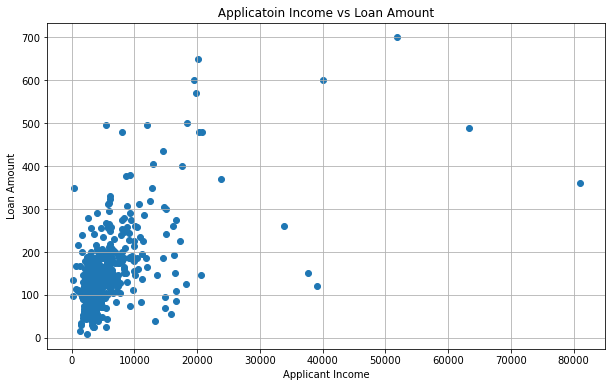

In [14]:
# 1. Scatter Plot

plt.figure(figsize=(10, 6))
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'])

plt.title(" Applicatoin Income vs Loan Amount ")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.grid()

plt.show()

### Here, we can see some positive correlation between Applicant Income and Loan Amount

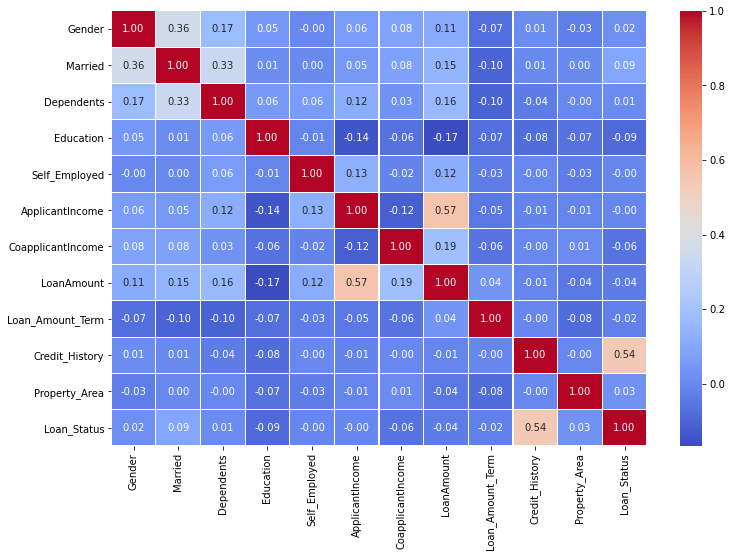

In [15]:
# 2. Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f',linewidths= .1)
plt.show()

### Here, we can see relation between two variable.

### 1) Find the predictors that are useful in predicting ‘Loan Status’.
Ans - Credit_History has some what stronge relation with target variabe so it is a stronge predictor. 
also we can consider 'Education', 'Gender' as a predictor variable.
So, our final list = ['Credit_History', 'Education', 'Gender']

## Model Building

### 1. Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# making object model
logistic_model = LogisticRegression()

In [18]:
# Seperating X, Y train data
train_features = ['Credit_History', 'Education', 'Gender']

x_train = df[train_features].values
y_train = df['Loan_Status']

x_test = df1[train_features].values

In [19]:
# Fit data into model
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [20]:
# Printing Coefficient of model
print('Coefficient of model :', logistic_model.coef_)

Coefficient of model : [[ 3.316164   -0.3059193   0.09398266]]


In [21]:
# Printing Intercept of model
print('Intercept of model',logistic_model.intercept_)

Intercept of model [-1.98307795]


In [22]:
# Printing score of train data
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


### By using LogisticRegression model we can predict loan_status with an accuracy of 80.94%

In [23]:
# Predicting loan status of Test data
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


### Here, we can see predicted loan_status of test data.

### 2. Support Vector Machine

In [24]:
from sklearn import svm 

In [25]:
# Seperating X, Y train data

x_train = df.iloc[:,1:12]
y_train = df['Loan_Status']

x_test = df1.iloc[:,1:12]

In [26]:
# making object model and fitting data into it
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [27]:
# Printing score of train data
score = clf.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.7931596091205212
accuracy_score percent : 79.32


In [28]:
# Predicting loan status of Test data
predict_test = clf.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### By using SVC model we can predict loan_status with an accuracy of 79.32%

### 3. Decission Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
# making object model and fitting data into it
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
# Printing score of train data
score = clf.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 1.0
accuracy_score percent : 100.0


In [32]:
# Predicting loan status of Test data
predict_test = clf.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1
 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1]


In [33]:
# making object model with entropy and 5 maxdepth and fitting data into it
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [34]:
# Printing score of train data
score = clf.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8338762214983714
accuracy_score percent : 83.39


In [35]:
# Predicting loan status of Test data
predict_test = clf.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1]


### By using DecissionTree model we can predict loan_status with an accuracy of 100%

### And By using DecissionTree model with entropy criterion and 5 max_depth we can predict loan_status with an accuracy of 83.39%